# Scaling the Data

In [1]:
# Importing the libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler,minmax_scale,minmax_scale

In [2]:
# Make the example data
df = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,180,185],
    'weight': [55,60,65,70,75]
}

# conver this data to pandas datafram
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


- from +3 to -3

In [3]:
# import scaler from sklearn
scaler = StandardScaler()
# fit the scaler to the data
scaler.fit(df)
# transform the data using the scaler
scaled_data = scaler.transform(df)
# convert the scaled data to pandas dataframe
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
# print the scaled data 
print(scaled_df.head())

        age    height    weight
0 -1.414214 -1.414214 -1.414214
1 -0.707107 -0.707107 -0.707107
2  0.000000  0.000000  0.000000
3  0.707107  0.707107  0.707107
4  1.414214  1.414214  1.414214


## Min Max scaler

In [ ]:
# import minmax_scale from sklearn
from sklearn.preprocessing import minmax_scale
# fit the minmax scaler to the data
minmax_scaled_data = minmax_scale(df, feature_range=(0, 1))
# convert the minmax scaled data to pandas dataframe
minmax_scaled_df = pd.DataFrame(minmax_scaled_data, columns=df.columns)
# print the minmax scaled data
print(minmax_scaled_df.head())

    age  height  weight
0  0.00    0.00    0.00
1  0.25    0.25    0.25
2  0.50    0.50    0.50
3  0.75    0.75    0.75
4  1.00    1.00    1.00


## Max ABS Scaler

In [6]:
# import max_abs_scale from sklearn
from sklearn.preprocessing import MaxAbsScaler
# fit the max abs scaler to the data
max_abs_scaler = MaxAbsScaler()
max_abs_scaler.fit(df)
# transform the data using the max abs scaler
max_abs_scaled_data = max_abs_scaler.transform(df)
# convert the max abs scaled data to pandas dataframe
max_abs_scaled_df = pd.DataFrame(max_abs_scaled_data, columns=df.columns)
# print the max abs scaled data
print(max_abs_scaled_df.head())

        age    height    weight
0  0.555556  0.891892  0.733333
1  0.666667  0.918919  0.800000
2  0.777778  0.945946  0.866667
3  0.888889  0.972973  0.933333
4  1.000000  1.000000  1.000000


## Reboust scaler

In [7]:
# reboust scaler from sklearn

from sklearn.preprocessing import RobustScaler
# fit the robust scaler to the data
robust_scaler = RobustScaler()
robust_scaler.fit(df)
# transform the data using the robust scaler
robust_scaled_data = robust_scaler.transform(df)
# convert the robust scaled data to pandas dataframe

robust_scaled_df = pd.DataFrame(robust_scaled_data, columns=df.columns)
# print the robust scaled data
print(robust_scaled_df.head())

   age  height  weight
0 -1.0    -1.0    -1.0
1 -0.5    -0.5    -0.5
2  0.0     0.0     0.0
3  0.5     0.5     0.5
4  1.0     1.0     1.0


# Transformation

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# generate non-normal data (exponential Distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

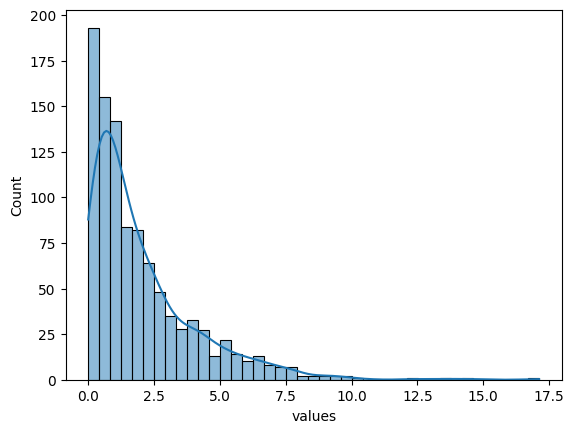

In [16]:
sns.histplot(df['values'], kde=True)

In [17]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

# boxbcox k liay data must be postive
df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']] + 1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['Quantile'] = qt_normal.fit_transform(df[['values']])

In [18]:
df.head()

,values,Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930


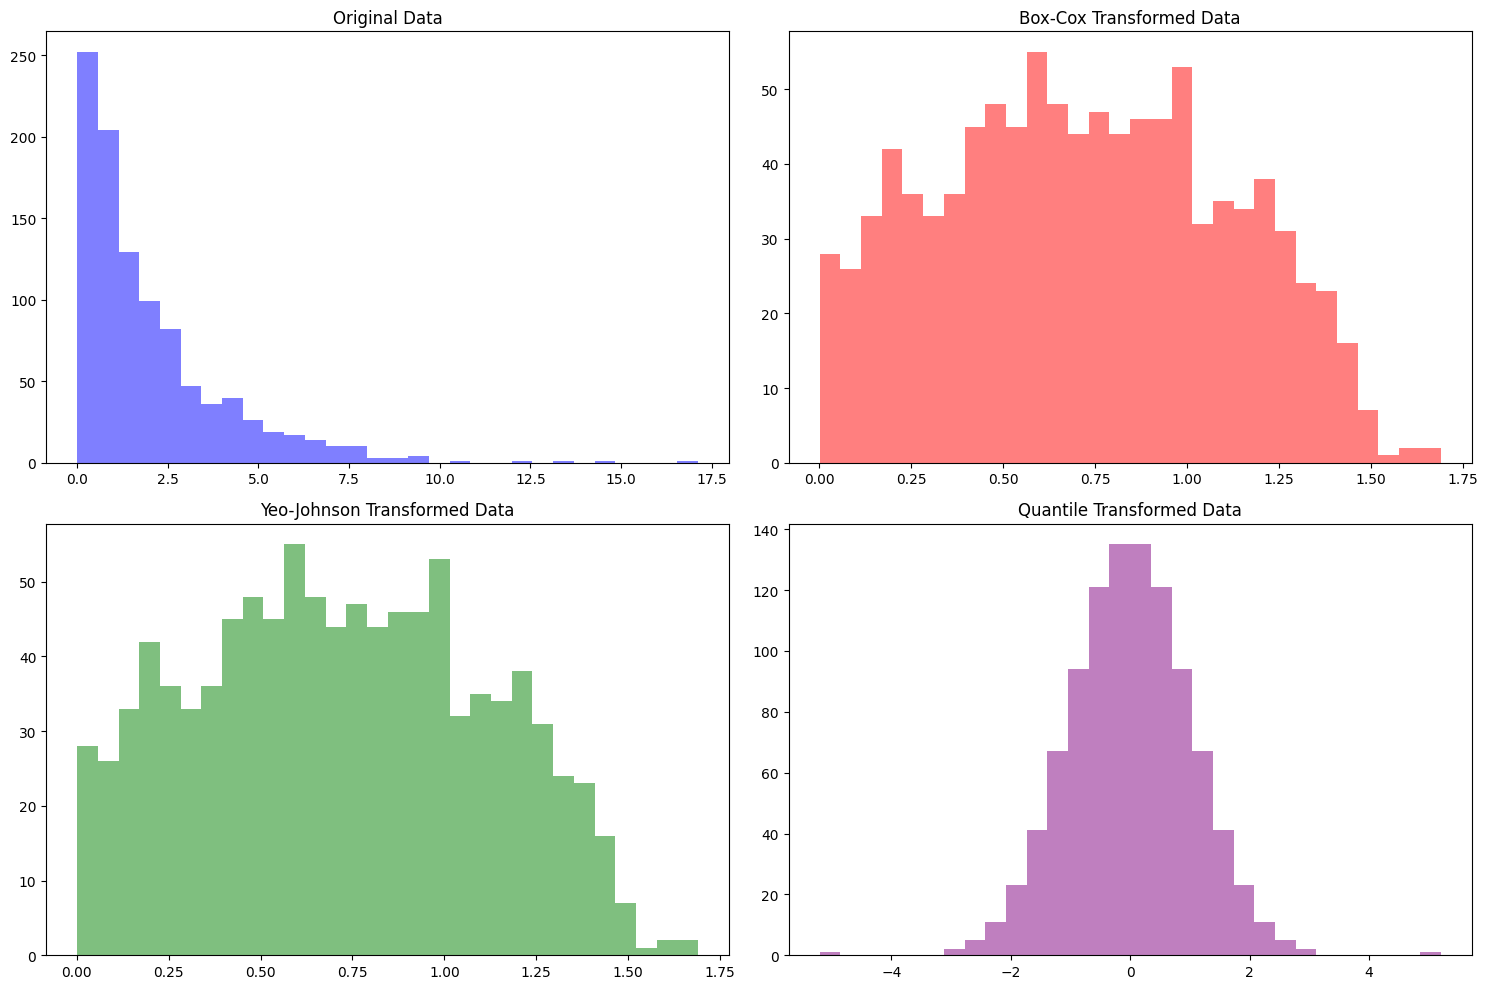

In [19]:
# plot the data
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.hist(df['values'], bins=30, color='blue', alpha=0.5, label='Original')
plt.title('Original Data')
plt.subplot(2, 2, 2)
plt.hist(df['Box_Cox'], bins=30, color='red', alpha=0.5, label='Box-Cox')
plt.title('Box-Cox Transformed Data')
plt.subplot(2, 2, 3)
plt.hist(df['Yeo_Johnson'], bins=30, color='green', alpha=0.5, label='Yeo-Johnson')
plt.title('Yeo-Johnson Transformed Data')
plt.subplot(2, 2, 4)
plt.hist(df['Quantile'], bins=30, color='purple', alpha=0.5, label='Quantile')
plt.title('Quantile Transformed Data')
plt.tight_layout()
plt.show()

- Hance, Qantile transformation having very good effect on out ML algorithm

# Normalization

## L-2 Normalization

In [20]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


## L-1 Normalizer

In [21]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))   


[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


- Z-score normalization
- Standard Scalar
- Min-Max normalization
- Min-Max Scalar

## Log transformation

In [22]:
import pandas as pd
import numpy as np

# example dataset with skewed values
df = { "Values": [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000,1000000]}
df = pd.DataFrame(df)
df.head()

,Values
0,1
1,5
2,10
3,20
4,50


In [23]:
df['log_values'] = np.log(df['Values'])
df

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


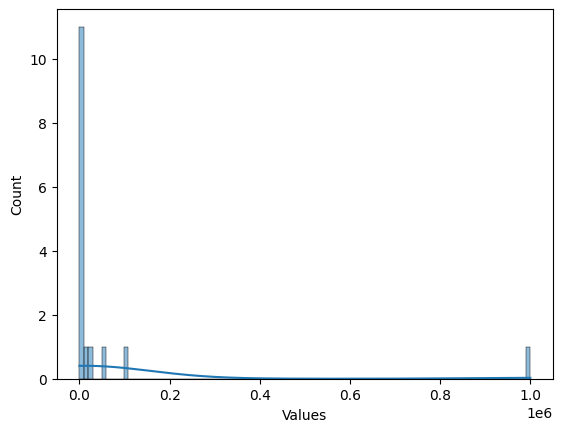

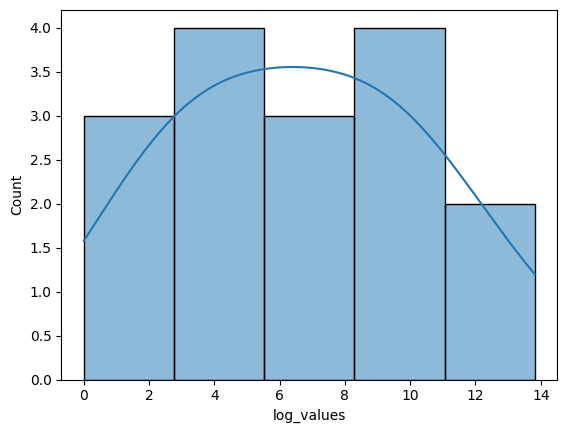

In [24]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()